In [1]:
import cv2
from openpiv import pyprocess, piv
import numpy as np
import matplotlib.pyplot as plt

### PIV Implemented using OpenPIV package on 120 fps plume video

This takes a fixed background subtracted plume motion video and finds the particle image velocimetry info using OpenPIV "extended_search_area_piv". 100 frames are used (amounting to a bit less than a second of processed video), this took about 20 seconds to process 

In [2]:
# WARNING: CUSTOM CROPPING USED AT IMAGE1 AND IMAGE2 DEFINITIONS IN THE PIV PROCESS
# IF ANOTHER VIDEO IS USED, PLEASE CHANGE THIS

spatial_subsample = 1

vidcap = cv2.VideoCapture("C:/Users/laure/Documents/ARA/laurd_ara/video_processing/fxd_low_1.mp4")
success, image1 = vidcap.read()

#load first image to compute PIV
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)[100:-80:spatial_subsample,800:1500:spatial_subsample]


count = 0
U = []
V = []


#this just loops through 100 frames of video as a toy example
while success and count < 100:

    success, image2 = vidcap.read()

    #load second image to compute PIV
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)[100:-80:spatial_subsample,800:1500:spatial_subsample]

    if success:
        if count%1==0:

            #windowed PIV calculation using openpiv extended_search_area_piv function, 
            u,v,s2n = pyprocess.extended_search_area_piv(image1, image2,window_size=64,overlap=32)

            #grabs pixel coordinates corresponding to calculation windows
            x,y = pyprocess.get_coordinates(image1.shape[:2],search_area_size=64,overlap=32)

            #update image 1
            image1 = image2.copy()
            
            # for the given time "count", add u (x velocity) and v (y velocity) vector fields to the list
            U.append(u)
            V.append(v)
        count += 1

In [3]:
#average those vector fields for the 100 frames


U = np.stack(U)
Umean = np.mean(U, axis=0)
V = np.stack(V)
Vmean = np.mean(V,axis=0)

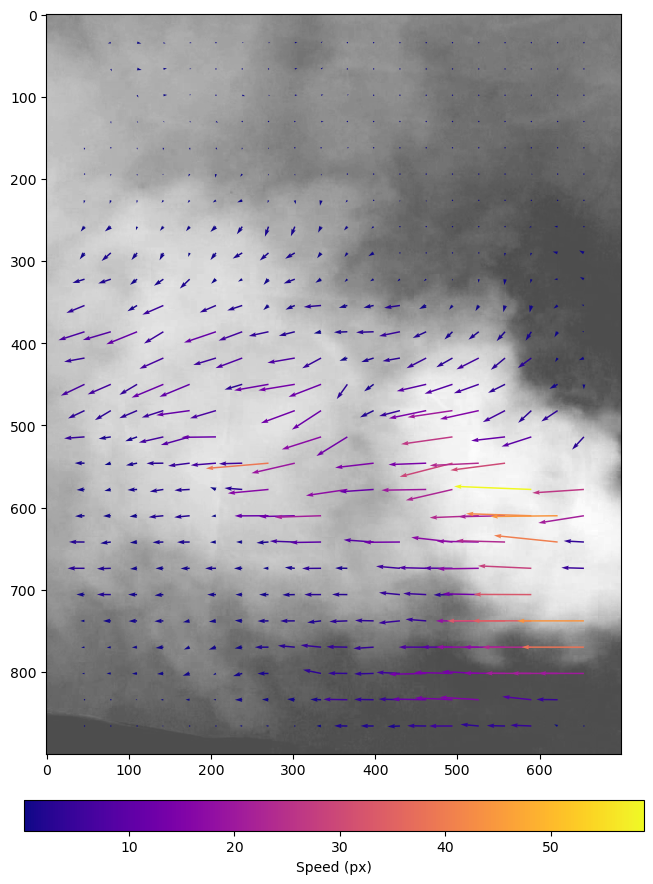

In [10]:
# plot showing the second to last frame from the video and overlay the mean vector fields
# from the PIV calculations

fig,ax = plt.subplots(figsize=(8,12))
ax.imshow(image1,alpha=0.7,cmap="gray")
Q= ax.quiver(x,y,Umean,Vmean,Umean**2+Vmean**2, cmap="plasma")
plt.colorbar(Q, orientation='horizontal',label="Speed (px)",pad=0.05)
plt.show()